In [77]:
import pandas as pd
import psycopg2

pd.options.display.max_rows = 500
pd.options.display.max_columns = 30

from IPython.display import display


In [2]:
COUNTRY = 'netherlands'

In [3]:
from utilities import db_to_pandas

sql_query = """
SELECT tweet_id, concepts, tweet_body->>'created_at' as created_at
FROM tweet
WHERE location_id LIKE '{}%'
AND concepts IS NOT NULL
AND tweet_body->>'lang' = 'nl'
;
""".format(COUNTRY)

df_from_db = db_to_pandas(sql_query)

In [4]:
# convert to timestamps to days
df_from_db['date'] = pd.to_datetime(df_from_db['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_from_db['date'] = df_from_db.date.dt.normalize()

df_from_db.head(10)

,tweet_id,concepts,created_at,date
0,1235874511221858304,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Fri Mar 06 10:26:59 +0000 2020,2020-03-06
1,1234209572933578752,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:11:07 +0000 2020,2020-03-01
2,1234211571817205760,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:19:03 +0000 2020,2020-03-01
3,1234213418598576128,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:26:24 +0000 2020,2020-03-01
4,1234213546298413061,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:26:54 +0000 2020,2020-03-01
5,1234213364060086275,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:26:11 +0000 2020,2020-03-01
6,1234218181973114880,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:45:19 +0000 2020,2020-03-01
7,1234207120763084807,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:01:22 +0000 2020,2020-03-01
8,1234207558396760064,"[{'support': 22, 'URI': 'http://nl.dbpedia.org...",Sun Mar 01 20:03:07 +0000 2020,2020-03-01
9,1234210799037579265,"[{'support': 161, 'URI': 'http://nl.dbpedia.or...",Sun Mar 01 20:15:59 +0000 2020,2020-03-01


In [5]:
# expand concepts to have its own series
a = df_from_db.explode('concepts')
concept_df = (a.assign(concepts = a['concepts'].str.get('surfaceForm'))\
              .groupby(['date','concepts'])['concepts'].count().reset_index(name='count'))
concept_df

,date,concepts,count
0,2020-02-26,15 maart,2
1,2020-02-26,18 januari,2
2,2020-02-26,19 maart,2
3,2020-02-26,26 februari,1
4,2020-02-26,27 februari,1
...,...,...,...
6090,2020-03-12,zombie,1
6091,2020-03-12,zon,3
6092,2020-03-12,zorgverzekeraar,23
6093,2020-03-12,zuivel,1


In [6]:
top_concepts = concept_df.groupby(['concepts']).agg({'count':sum}).sort_values(['count'], ascending=False)
top_concepts

,count
concepts,
coronavirus,27883
Nederland,9029
RIVM,4571
Coronavirus,2976
Italië,2157
...,...
Prinsjesdag,1
Prinsenbeek,1
Praag,1


In [7]:
# find interesting concepts to take into account
top_concepts.head(200)

,count
concepts,
coronavirus,27883
Nederland,9029
RIVM,4571
Coronavirus,2976
Italië,2157
quarantaine,1903
GGD,1874
Kamer,1268
Frankrijk,1123


In [8]:
stop = ('coronavirus', 'Coronavirus', 'Corona', 'CoronaVirus', 'do', 'amp', 'Deutschland', 'via', 'tun', 'primer', 'un', 'del')
relevant_top = concept_df[~concept_df.concepts.isin(stop)]
relevant_top.groupby(['concepts']).agg({'count':sum}).sort_values(['count'], ascending=False)

,count
concepts,
Nederland,9029
RIVM,4571
Italië,2157
quarantaine,1903
GGD,1874
...,...
Prinsjesdag,1
Prinsenbeek,1
Praag,1


In [84]:
def merge_topics(df, topic):
    # filter topics from df
    cdf = df[df['concepts'].isin(topic['topics'])]
    
    # overwrite concepts with topic name
    cdf.loc[:,'concepts'] = topic['name']
    
    # count concepts
    g = cdf.groupby(['date', 'concepts']).agg({'count': sum}).reset_index()
    g.set_index(['date', 'concepts'])
    return g

In [85]:
if COUNTRY == 'germany':
    protect = {'name': 'protection','topics': ['Desinfektionsmittel', 'Quarantäne', 'Mundschutz', 'Klopapier', 
                                               'Hände schütteln', 'Hygiene']}
    countries = {'name': 'other countries', 'topics': ['EU', 'Italien', 'Mailand', 'Hongkong', 'Israel', 'Roma', 'Iran', 'Südkorea', 'China', 'china', 
                                                       'US', 'USA', 'Geneva', 'Österreich']}
    sources = {'name': 'national institutions', 'topics': ['Virologe', 'Robert-Koch Institut', 'RKI', 
                                                         'Jens Spahn', 'Bundesregierung', 'Merkel', 
                                                         'Angela Merkel', 'Bundesgesundheitsminister']}
elif COUNTRY == 'netherlands':
    protect = {'name': 'protection','topics': ['quarantaine', 'volksgezondheid', 'vaccin', 'supermarkt']}
    countries = {'name': 'other countries', 'topics': ['EU', 'Iran', 'China', 'china', 'Italiaanse', 'Italië', 'Korea', 
                                                       'Japan', 'Duitsland', 'Frankrijk', 'Israël', 'Lombardije', 'Zuid-Korea', 'België']}
    sources = {'name': 'national institutions', 'topics': ['RIVM', 'GGD', 'rivm', 'vws', 'VWS', 'Mark Rutte', 'Viroloog']}
else:
    print("invalid COUNTRY")


df1 = merge_topics(concept_df, protect)
df2 = merge_topics(concept_df, countries)
df3 = merge_topics(concept_df, sources)

#df1['concepts'] = 'protection'
#df2['concepts'] = 'other countries'
#df3['concepts'] = 'national institutions'
interesting_df = pd.concat([df1, df2, df3])
interesting_df.head()

,date,concepts,count
0,2020-02-26,protection,21
1,2020-02-27,protection,27
2,2020-02-28,protection,48
3,2020-02-29,protection,15
4,2020-03-01,protection,48


In [87]:
sql_query = """
SELECT tweet_body->>'created_at' as created_at
FROM tweet
WHERE location_id LIKE '{}%'
AND tweet_body->>'lang' = 'nl'
;
""".format(COUNTRY)

all_tweets = db_to_pandas(sql_query)
all_tweets['date'] = pd.to_datetime(all_tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
all_tweets['date'] = all_tweets.date.dt.normalize()

total_tweets = all_tweets['date'].value_counts()
total_tweets = total_tweets.to_frame().reset_index().rename(columns={'index': 'date', 'date': 'count'})
total_tweets.info

total_tweets

,date,count
0,2020-03-12,19381
1,2020-03-11,6881
2,2020-03-10,5526
3,2020-02-28,4969
4,2020-02-27,3796
5,2020-03-09,3742
6,2020-03-08,3408
7,2020-03-06,3006
8,2020-03-05,2960
9,2020-03-01,2807


In [ ]:
!pip install seaborn

        date    concepts  count
0 2020-02-26  protection     21
1 2020-02-27  protection     27
2 2020-02-28  protection     48
3 2020-02-29  protection     15
4 2020-03-01  protection     48
5 2020-03-02  protection     36
6 2020-03-03  protection     17
7 2020-03-04  protection     54
8 2020-03-05  protection     83
9 2020-03-06  protection     54


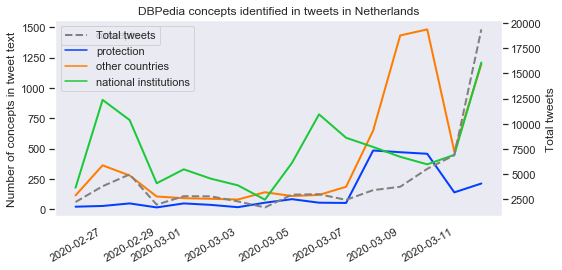

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

sns.set(style="dark")
palette = sns.color_palette("bright", 3)
plt.title("DBPedia concepts identified in tweets in {}".format(COUNTRY.title()))

#sns.set_context("poster")
plt.rcParams.update({'font.size': 30, 'figure.figsize': (10, 4) })

                         
# first axis
plot_df = interesting_df

print(plot_df.head(10))
ax1 = sns.lineplot(data=plot_df, x='date', y='count', hue='concepts', linewidth=2, palette=palette)

# second axis
ax2 = plt.twinx()
sns.lineplot(data=total_tweets, x='date', y='count', color="grey", ax=ax2, linewidth=2)
ax2.grid(False)

ax1.set(ylabel='Number of concepts in tweet text', xlabel=None)

ax2.set(ylabel='Total tweets')
ax2.lines[0].set_linestyle("--")

plt.legend(labels=['Total tweets', 'x'])

plt.gcf().autofmt_xdate()


plt.savefig('concepts_over_time_{}.png'.format(COUNTRY))

In [129]:
protect
countries
sources

# hmm
df = pd.DataFrame(columns=['superconcept', 'concepts'])
df.loc[1] = {'superconcept': protect['name'], 'concepts': ', '.join(sorted(protect['topics'], key=str.lower))}
df.loc[2] = {'superconcept': countries['name'], 'concepts': ', '.join(sorted(countries['topics'], key=str.lower))}
df.loc[3] = {'superconcept': sources['name'], 'concepts': ', '.join(sorted(sources['topics'], key=str.lower))}


display(df)
print(', '.join(sorted(countries['topics'], key=str.lower)))

df.to_latex('outputs/concepts.tex')


,superconcept,concepts
1,protection,"quarantaine, supermarkt, vaccin, volksgezondheid"
2,other countries,"België, China, china, Duitsland, EU, Frankrijk..."
3,national institutions,"GGD, Mark Rutte, RIVM, rivm, Viroloog, vws, VWS"


België, China, china, Duitsland, EU, Frankrijk, Iran, Israël, Italiaanse, Italië, Japan, Korea, Lombardije, Zuid-Korea
